# Data and Library Import

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime



import re 
import string
import nltk
#Download English Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_ENG = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/kh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Read data from files
path = './new-york-city-airbnb-open-data/AB_NYC_2019.csv'
headnum = 1 # Change it according to the real case
separater = ',' # Sometimes it's ';'
# CSV file
df = pd.read_csv(path,sep=separater) # add this code when you don't want certain columns: usecols = lambda x: x not in ['', ''] 

df.head() #view first few columns of data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# check if the dataframe has duplicated rows(can limit to specific columns if you want)
print('There are {} duplicated rows'.format(df.duplicated().sum()))

# Exploratory Data Analysis

In [11]:
print("Notebook to show EDA work")

Notebook to show EDA work


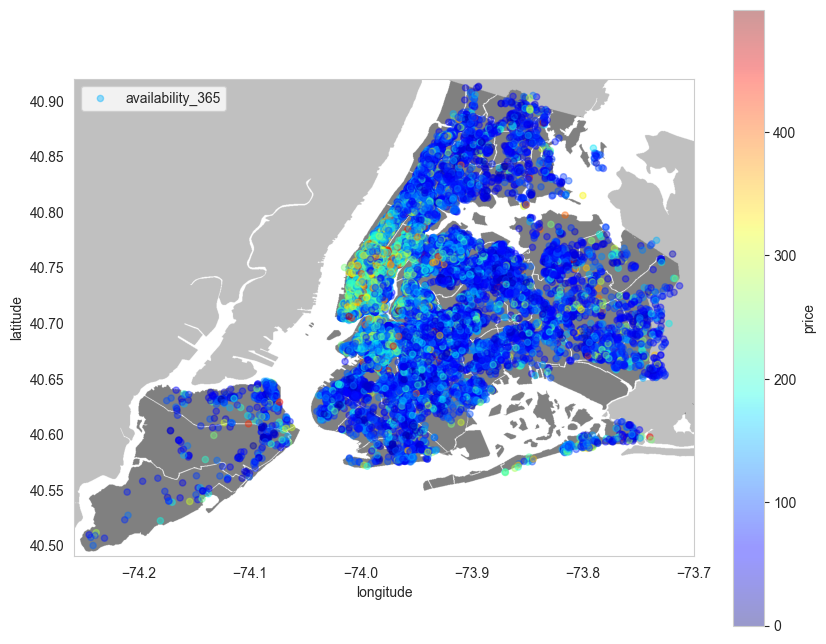

In [7]:
def plot_nyc_price_map(df):

  '''Plot the listings of in nyc to get a better idea of the geolocation of expensive listings.
  the price is limited to 500 as to not allow outliers to skew the scale of price color bar.
  '''
  #initializing the figure size
  plt.figure(figsize=(10,8))
  #import image
  nyc_img=plt.imread("new-york-city-airbnb-open-data/Neighbourhoods_New_York_City_Map.png")
  #scaling the image based on the latitude and longitude max and mins for proper output
  plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
  ax=plt.gca()
  #using scatterplot again
  df[df['price'] < 500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
            cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5, grid = False)

  plt.legend()
  plt.show()

plot_nyc_price_map(df)

name                               0.03%
host_id                            0.00%
host_name                          0.04%
neighbourhood_group                0.00%
neighbourhood                      0.00%
latitude                           0.00%
longitude                          0.00%
room_type                          0.00%
price                              0.00%
minimum_nights                     0.00%
number_of_reviews                  0.00%
last_review                       20.56%
reviews_per_month                 20.56%
calculated_host_listings_count     0.00%
availability_365                   0.00%


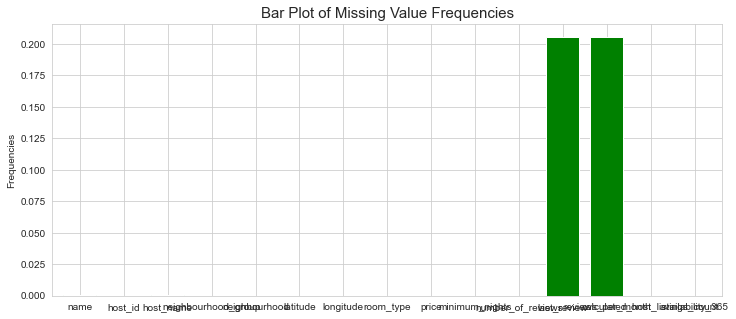

In [16]:
#count missing value and visualise
def missing_value(df):

  ''' Function to better visualize the the percentage of missing values 
  '''
  df_miss_num = df.iloc[:, 1:].isnull().sum()
  df_total_num = df.shape[0]
  df_miss_freq = df_miss_num / df_total_num
  print(df_miss_freq.apply(lambda x: format(x, '.2%')).to_string())

  plt.figure(figsize=(12, 5))
  df_miss_freq.plot.bar(width=0.75, rot=0, ax=plt.gca(), color = 'green')
  plt.ylabel('Frequencies')
  plt.title('Bar Plot of Missing Value Frequencies', fontsize=15)
  plt.show()

missing_value(df)

last review & reviews per month have 20% missing data

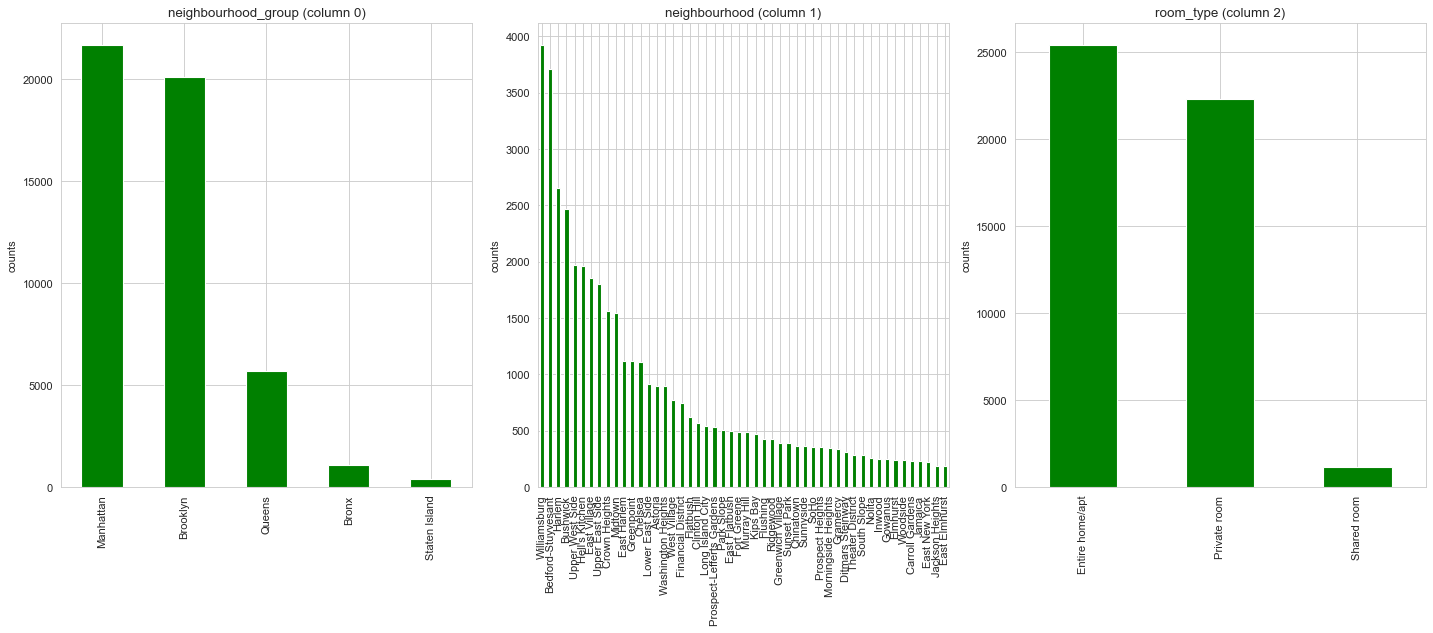

In [18]:
# Plot the distribution of the values in certain column (categorical columns)
cat_features = ['neighbourhood_group','neighbourhood','room_type']

def plot_density_per_cat_column(df, nGraphShown, nGraphPerRow,cat_features):
    ''' Function to plot the distribution of categorical variables
    '''
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k') # white/black
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            # To increase the readibility, only show top 50 results here
            valueCounts = columnDf.value_counts().head(50)
            valueCounts.plot.bar(color = 'green')
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
df_cat = df[cat_features]
plot_density_per_cat_column(df_cat, 3, 3,cat_features)

Listings seem to be focused in specific locations and not many occur in shared spaces

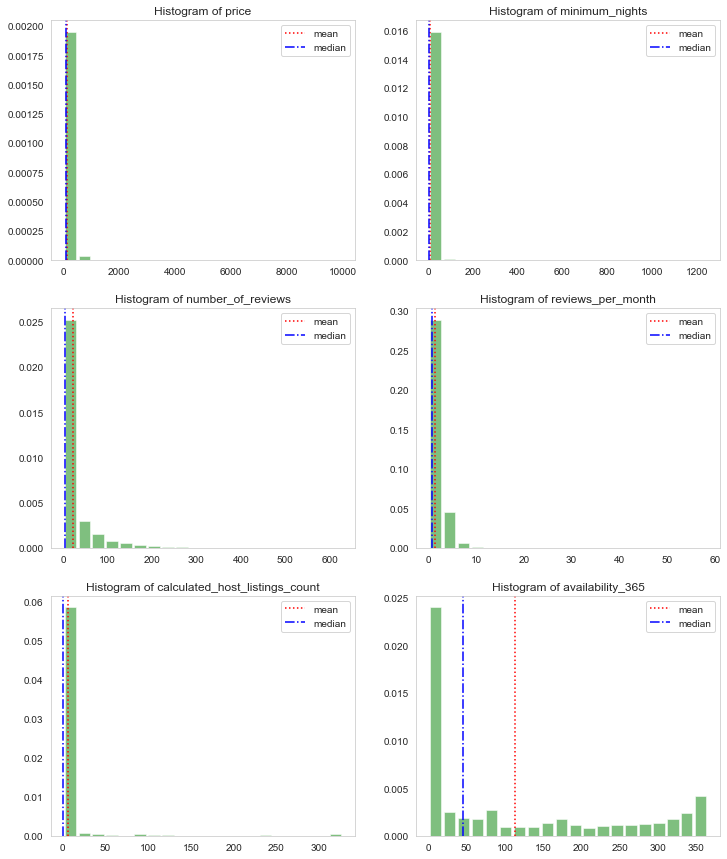

In [19]:
num_features = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
def plot_density_per_num_column(df,numerical_features):
  '''Function to plot the distribution of numerical features
  '''
  cols = 2
  rows = int(np.ceil(len(num_features)/cols))

  fig = plt.figure(figsize=(6*cols,5*rows))
  for i, fea_name in enumerate(numerical_features):
    ax = fig.add_subplot(rows,cols,i+1)
    df.loc[:,fea_name].hist(color='green',alpha=0.5,rwidth=0.8, density=True,
                            grid=False,ax=ax, bins=20)
    plt.axvline(df.loc[:,fea_name].mean(), 
                color='r',linestyle=':',label = 'mean')
    plt.axvline(df.loc[:,fea_name].median(), color='b', linestyle='-.', 
                label = 'median')
    plt.legend()
    #df.loc[:,fea_name].plot(kind='density', color='green')
    ax.set_title("Histogram of " + fea_name)
    
  plt.show()
plot_density_per_num_column(df,num_features)

It is difficult to visualize distribution with due to the impact of outliers